[![GitHub issues by-label](https://img.shields.io/github/issues-raw/pfebrer/sisl/FatbandsPlot?style=for-the-badge)](https://github.com/pfebrer/sisl/labels/FatbandsPlot)

    
    
FatbandsPlot
=========

In [1]:
import sisl
import sisl.viz

For this notebook we will create a toy "Boron nitride" tight binding:

In [2]:
# First, we create the geometry
BN = sisl.geom.graphene(atoms=["B", "N"])

# Create a hamiltonian with different on-site terms
H = sisl.Hamiltonian(BN)

H[0, 0] = 2
H[1, 1] = -2

H[0, 1] = -2.7
H[1, 0] = -2.7

H[0, 1, (-1, 0)] = -2.7
H[0, 1, (0, -1)] = -2.7
H[1, 0, (1, 0)] = -2.7
H[1, 0, (0, 1)] = -2.7

Note that we could have obtained this hamiltonian from any other source. Then we generate a path for the band structure:

In [3]:
band = sisl.BandStructure(H, [[0., 0.], [2./3, 1./3],
                              [1./2, 1./2], [1., 1.]], 301,
                              [r'$\Gamma$', 'K', 'M', r'$\Gamma$'])

And finally we just ask for the fatbands plot:

In [4]:
fatbands = band.plot.fatbands()
fatbands

AttributeError: type object 'DOMWidget' has no attribute '_ipython_display_'

FigureWidget({
    'data': [{'hoverinfo': 'name',
              'hovertemplate': '%{y:.2f} eV',
              'line': {'color': 'black', 'width': 1.0},
              'mode': 'lines',
              'name': '0',
              'opacity': 1,
              'type': 'scatter',
              'uid': '42cfbcfb-0ee7-4fcb-8f9a-4c3329827f1d',
              'x': array([0.        , 0.01341022, 0.02682044, ..., 4.00275628, 4.0161647 ,
                          4.02957312]),
              'y': array([-8.34326075, -8.34254788, -8.34040948, ..., -8.34041025, -8.34254807,
                          -8.34326075])},
             {'hoverinfo': 'name',
              'hovertemplate': '%{y:.2f} eV',
              'line': {'color': 'black', 'width': 1.0},
              'mode': 'lines',
              'name': '1',
              'opacity': 1,
              'type': 'scatter',
              'uid': '3f88ad1b-efe1-4319-822c-b1043e3b8743',
              'x': array([0.        , 0.01341022, 0.02682044, ..., 4.00275628, 4.0161647 ,
                          4.02957312]),
              'y': array([8.34326075, 8.34254788, 8.34040948, ..., 8.34041025, 8.34254807,
                          8.34326075])}],
    'layout': {'template': '...',
               'xaxis': {'mirror': True,
                         'range': [0.0, 4.029573120325097],
                         'showgrid': True,
                         'ticktext': [$\Gamma$, K, M, $\Gamma$],
                         'tickvals': [0.0, 1.7030979945861209, 2.5546469918791828,
                                      4.029573120325097],
                         'title': {'text': 'K'}},
               'yaxis': {'mirror': True,
                         'range': [-8.343260753446462, 8.343260753446462],
                         'title': {'text': 'Energy [eV]'}}}
})

We only see the bands here, but this is a fatbands plot, and it is ready to accept your requests on what to draw!

## Requesting specific weights

The fatbands that the plot draws are controlled by the `groups` setting.

In [5]:
print(fatbands.get_param("groups").help)

The different groups that are displayed in the fatbands

 Each item is a dict. 

 Structure of the dict: {
	'name': 
	'species': 
	'atoms': 

 Structure of the dict: {
	'index': 

 Structure of the dict: {
	'in': 
}
	'fx': 
	'fy': 
	'fz': 
	'x': 
	'y': 
	'z': 
	'Z': 
	'neighbours': 

 Structure of the dict: {
	'range': 
	'R': 
	'neigh_tag': 
}
	'tag': 
	'seq': 
}
	'orbitals': 
	'spin': 
	'normalize': 
	'color': 
	'scale': 
}


This setting works exactly like the `requests` setting in `PdosPlot`, which is documented [here](./PdosPlot.ipynb). Therefore we won't give an extended description of it, but just quickly show that you can autogenerate the groups:

In [6]:
fatbands.split_groups(on="species")

AttributeError: type object 'DOMWidget' has no attribute '_ipython_display_'

FigureWidget({
    'data': [{'fill': 'toself',
              'legendgroup': ' | species=B',
              'line': {'color': '#28c56a', 'width': 0},
              'mode': 'lines',
              'name': ' | species=B',
              'showlegend': True,
              'type': 'scatter',
              'uid': 'd65c2438-3758-4f0a-af89-7e467c47706c',
              'x': [0.0, 0.01341022042981197, 0.02682044085962394, ...,
                    0.02682044085962394, 0.01341022042981197, 0.0],
              'y': [-7.963117968694938, -7.962415338155459, -7.960307670091624,
                    ..., -8.720511290218582, -8.72268042401313, -8.723403538197985]},
             {'fill': 'toself',
              'legendgroup': ' | species=B',
              'line': {'color': '#28c56a', 'width': 0},
              'mode': 'lines',
              'name': ' | species=B',
              'showlegend': False,
              'type': 'scatter',
              'uid': '0a66f0a7-f861-4362-bb8c-327ce8987c17',
              'x': [0.0, 0.01341022042981197, 0.02682044085962394, ...,
                    0.02682044085962394, 0.01341022042981197, 0.0],
              'y': [8.963117968694938, 8.96241533815546, 8.960307670091623, ...,
                    7.720511290218581, 7.722680424013131, 7.723403538197985]},
             {'fill': 'toself',
              'legendgroup': ' | species=N',
              'line': {'color': '#56e6a3', 'width': 0},
              'mode': 'lines',
              'name': ' | species=N',
              'showlegend': True,
              'type': 'scatter',
              'uid': 'd12b75ec-f450-4801-b3cb-ce67ab3100ed',
              'x': [0.0, 0.01341022042981197, 0.02682044085962394, ...,
                    0.02682044085962394, 0.01341022042981197, 0.0],
              'y': [-7.723403538197985, -7.722680424013132, -7.720511290218582,
                    ..., -8.960307670091623, -8.96241533815546, -8.963117968694938]},
             {'fill': 'toself',
              'legendgroup': ' | species=N',
              'line': {'color': '#56e6a3', 'width': 0},
              'mode': 'lines',
              'name': ' | species=N',
              'showlegend': False,
              'type': 'scatter',
              'uid': 'a86f5cff-3e75-48f1-a272-694d23bd7702',
              'x': [0.0, 0.01341022042981197, 0.02682044085962394, ...,
                    0.02682044085962394, 0.01341022042981197, 0.0],
              'y': [8.723403538197985, 8.72268042401313, 8.720511290218582, ...,
                    7.960307670091624, 7.962415338155459, 7.963117968694938]},
             {'hoverinfo': 'name',
              'hovertemplate': '%{y:.2f} eV',
              'line': {'color': 'black', 'width': 1.0},
              'mode': 'lines',
              'name': '0',
              'opacity': 1,
              'type': 'scatter',
              'uid': 'fc559029-b847-474c-b710-b6adcd273d06',
              'x': array([0.        , 0.01341022, 0.02682044, ..., 4.00275628, 4.0161647 ,
                          4.02957312]),
              'y': array([-8.34326075, -8.34254788, -8.34040948, ..., -8.34041025, -8.34254807,
                          -8.34326075])},
             {'hoverinfo': 'name',
              'hovertemplate': '%{y:.2f} eV',
              'line': {'color': 'black', 'width': 1.0},
              'mode': 'lines',
              'name': '1',
              'opacity': 1,
              'type': 'scatter',
              'uid': '43d4cc62-6f20-49b9-86ef-ae5980c29344',
              'x': array([0.        , 0.01341022, 0.02682044, ..., 4.00275628, 4.0161647 ,
                          4.02957312]),
              'y': array([8.34326075, 8.34254788, 8.34040948, ..., 8.34041025, 8.34254807,
                          8.34326075])}],
    'layout': {'template': '...',
               'xaxis': {'mirror': True,
                         'range': [0.0, 4.029573120325097],
                         'showgrid': True,
                         'ticktext': [$\Gamma$, K, M, $\Gamma$],
                         'tickvals': [0.0

Or write them yourself if you want the maximum flexibility:

In [7]:
fatbands.update_settings(groups=[
    {"species": "N", "color": "blue", "name": "Nitrogen"},
    {"species": "B", "color": "red", "name": "Boron"}
])

AttributeError: type object 'DOMWidget' has no attribute '_ipython_display_'

FigureWidget({
    'data': [{'fill': 'toself',
              'legendgroup': 'Nitrogen',
              'line': {'color': 'blue', 'width': 0},
              'mode': 'lines',
              'name': 'Nitrogen',
              'showlegend': True,
              'type': 'scatter',
              'uid': 'dee5d374-8b9b-4321-937c-1a05a264359c',
              'x': [0.0, 0.01341022042981197, 0.02682044085962394, ...,
                    0.02682044085962394, 0.01341022042981197, 0.0],
              'y': [-7.723403538197985, -7.722680424013132, -7.720511290218582,
                    ..., -8.960307670091623, -8.96241533815546, -8.963117968694938]},
             {'fill': 'toself',
              'legendgroup': 'Nitrogen',
              'line': {'color': 'blue', 'width': 0},
              'mode': 'lines',
              'name': 'Nitrogen',
              'showlegend': False,
              'type': 'scatter',
              'uid': 'ee8d88e1-1bb1-4fab-80c8-3a98f454010f',
              'x': [0.0, 0.01341022042981197, 0.02682044085962394, ...,
                    0.02682044085962394, 0.01341022042981197, 0.0],
              'y': [8.723403538197985, 8.72268042401313, 8.720511290218582, ...,
                    7.960307670091624, 7.962415338155459, 7.963117968694938]},
             {'fill': 'toself',
              'legendgroup': 'Boron',
              'line': {'color': 'red', 'width': 0},
              'mode': 'lines',
              'name': 'Boron',
              'showlegend': True,
              'type': 'scatter',
              'uid': '5f860ef2-517a-4bf2-9728-797f1bf5f587',
              'x': [0.0, 0.01341022042981197, 0.02682044085962394, ...,
                    0.02682044085962394, 0.01341022042981197, 0.0],
              'y': [-7.963117968694938, -7.962415338155459, -7.960307670091624,
                    ..., -8.720511290218582, -8.72268042401313, -8.723403538197985]},
             {'fill': 'toself',
              'legendgroup': 'Boron',
              'line': {'color': 'red', 'width': 0},
              'mode': 'lines',
              'name': 'Boron',
              'showlegend': False,
              'type': 'scatter',
              'uid': 'c22092ae-eb6b-4ae1-a9e2-528f9d3da169',
              'x': [0.0, 0.01341022042981197, 0.02682044085962394, ...,
                    0.02682044085962394, 0.01341022042981197, 0.0],
              'y': [8.963117968694938, 8.96241533815546, 8.960307670091623, ...,
                    7.720511290218581, 7.722680424013131, 7.723403538197985]},
             {'hoverinfo': 'name',
              'hovertemplate': '%{y:.2f} eV',
              'line': {'color': 'black', 'width': 1.0},
              'mode': 'lines',
              'name': '0',
              'opacity': 1,
              'type': 'scatter',
              'uid': '7fa82524-defc-41d3-b91d-c04c9df46a96',
              'x': array([0.        , 0.01341022, 0.02682044, ..., 4.00275628, 4.0161647 ,
                          4.02957312]),
              'y': array([-8.34326075, -8.34254788, -8.34040948, ..., -8.34041025, -8.34254807,
                          -8.34326075])},
             {'hoverinfo': 'name',
              'hovertemplate': '%{y:.2f} eV',
              'line': {'color': 'black', 'width': 1.0},
              'mode': 'lines',
              'name': '1',
              'opacity': 1,
              'type': 'scatter',
              'uid': 'fc4eccea-3de6-4750-9f36-43a7a9b63451',
              'x': array([0.        , 0.01341022, 0.02682044, ..., 4.00275628, 4.0161647 ,
                          4.02957312]),
              'y': array([8.34326075, 8.34254788, 8.34040948, ..., 8.34041025, 8.34254807,
                          8.34326075])}],
    'layout': {'template': '...',
               'xaxis': {'mirror': True,
                         'range': [0.0, 4.029573120325097],
                         'showgrid': True,
                         'ticktext': [$\Gamma$, K, M, $\Gamma$],
                         'tickvals': [0.0, 1.7030979945861209, 2.5546469918791828,
                

## Scaling fatbands

The visual appeal of fatbands depends a lot on the size of your plot, therefore there's one global `scale` setting that scales all fatbands at the same time:

In [8]:
fatbands.update_settings(scale=2)

AttributeError: type object 'DOMWidget' has no attribute '_ipython_display_'

FigureWidget({
    'data': [{'fill': 'toself',
              'legendgroup': 'Nitrogen',
              'line': {'color': 'blue', 'width': 0},
              'mode': 'lines',
              'name': 'Nitrogen',
              'showlegend': True,
              'type': 'scatter',
              'uid': '419bf9fd-6107-4914-a52d-77f3ba9195ff',
              'x': [0.0, 0.01341022042981197, 0.02682044085962394, ...,
                    0.02682044085962394, 0.01341022042981197, 0.0],
              'y': [-7.103546322949509, -7.102812966941968, -7.10061310028206,
                    ..., -9.580205860028144, -9.582282795226622,
                    -9.582975183943415]},
             {'fill': 'toself',
              'legendgroup': 'Nitrogen',
              'line': {'color': 'blue', 'width': 0},
              'mode': 'lines',
              'name': 'Nitrogen',
              'showlegend': False,
              'type': 'scatter',
              'uid': 'f6d4ed29-643e-42cb-a8dc-0f37c66598a2',
              'x': [0.0, 0.01341022042981197, 0.02682044085962394, ...,
                    0.02682044085962394, 0.01341022042981197, 0.0],
              'y': [9.103546322949509, 9.102812966941967, 9.10061310028206, ...,
                    7.580205860028146, 7.5822827952266225, 7.5829751839434145]},
             {'fill': 'toself',
              'legendgroup': 'Boron',
              'line': {'color': 'red', 'width': 0},
              'mode': 'lines',
              'name': 'Boron',
              'showlegend': True,
              'type': 'scatter',
              'uid': 'dba5d87d-9b70-42af-bdd9-11a42e254f50',
              'x': [0.0, 0.01341022042981197, 0.02682044085962394, ...,
                    0.02682044085962394, 0.01341022042981197, 0.0],
              'y': [-7.5829751839434145, -7.5822827952266225, -7.580205860028145,
                    ..., -9.10061310028206, -9.102812966941968, -9.103546322949509]},
             {'fill': 'toself',
              'legendgroup': 'Boron',
              'line': {'color': 'red', 'width': 0},
              'mode': 'lines',
              'name': 'Boron',
              'showlegend': False,
              'type': 'scatter',
              'uid': '861f6ea8-44aa-4790-9497-99715f7c7e5b',
              'x': [0.0, 0.01341022042981197, 0.02682044085962394, ...,
                    0.02682044085962394, 0.01341022042981197, 0.0],
              'y': [9.582975183943415, 9.582282795226622, 9.580205860028146, ...,
                    7.10061310028206, 7.1028129669419675, 7.103546322949509]},
             {'hoverinfo': 'name',
              'hovertemplate': '%{y:.2f} eV',
              'line': {'color': 'black', 'width': 1.0},
              'mode': 'lines',
              'name': '0',
              'opacity': 1,
              'type': 'scatter',
              'uid': 'c44e9bae-c513-4864-9494-a564c510e00c',
              'x': array([0.        , 0.01341022, 0.02682044, ..., 4.00275628, 4.0161647 ,
                          4.02957312]),
              'y': array([-8.34326075, -8.34254788, -8.34040948, ..., -8.34041025, -8.34254807,
                          -8.34326075])},
             {'hoverinfo': 'name',
              'hovertemplate': '%{y:.2f} eV',
              'line': {'color': 'black', 'width': 1.0},
              'mode': 'lines',
              'name': '1',
              'opacity': 1,
              'type': 'scatter',
              'uid': '3cc47a0d-1187-43e2-94a0-c66a04a5ff29',
              'x': array([0.        , 0.01341022, 0.02682044, ..., 4.00275628, 4.0161647 ,
                          4.02957312]),
              'y': array([8.34326075, 8.34254788, 8.34040948, ..., 8.34041025, 8.34254807,
                          8.34326075])}],
    'layout': {'template': '...',
               'xaxis': {'mirror': True,
                         'range': [0.0, 4.029573120325097],
                         'showgrid': True,
                         'ticktext': [$\Gamma$, K, M, $\Gamma$],
                         'tickvals': [0.0, 1.7030979945861209, 2.554646991

You can also use the `scale_fatbands` method, which additionally lets you choose if you want to rescale from the current size or just set the value of `scale`:

In [9]:
fatbands.scale_fatbands(0.5, from_current=True)

AttributeError: type object 'DOMWidget' has no attribute '_ipython_display_'

FigureWidget({
    'data': [{'fill': 'toself',
              'legendgroup': 'Nitrogen',
              'line': {'color': 'blue', 'width': 0},
              'mode': 'lines',
              'name': 'Nitrogen',
              'showlegend': True,
              'type': 'scatter',
              'uid': '9482f900-8a0e-4df6-b98a-3131adc7f935',
              'x': [0.0, 0.01341022042981197, 0.02682044085962394, ...,
                    0.02682044085962394, 0.01341022042981197, 0.0],
              'y': [-7.723403538197985, -7.722680424013132, -7.720511290218582,
                    ..., -8.960307670091623, -8.96241533815546, -8.963117968694938]},
             {'fill': 'toself',
              'legendgroup': 'Nitrogen',
              'line': {'color': 'blue', 'width': 0},
              'mode': 'lines',
              'name': 'Nitrogen',
              'showlegend': False,
              'type': 'scatter',
              'uid': '4d2741de-7b1a-4028-89aa-c9d4187fbfde',
              'x': [0.0, 0.01341022042981197, 0.02682044085962394, ...,
                    0.02682044085962394, 0.01341022042981197, 0.0],
              'y': [8.723403538197985, 8.72268042401313, 8.720511290218582, ...,
                    7.960307670091624, 7.962415338155459, 7.963117968694938]},
             {'fill': 'toself',
              'legendgroup': 'Boron',
              'line': {'color': 'red', 'width': 0},
              'mode': 'lines',
              'name': 'Boron',
              'showlegend': True,
              'type': 'scatter',
              'uid': 'b3dc22aa-a3b3-407d-b099-bd857f4b1f7f',
              'x': [0.0, 0.01341022042981197, 0.02682044085962394, ...,
                    0.02682044085962394, 0.01341022042981197, 0.0],
              'y': [-7.963117968694938, -7.962415338155459, -7.960307670091624,
                    ..., -8.720511290218582, -8.72268042401313, -8.723403538197985]},
             {'fill': 'toself',
              'legendgroup': 'Boron',
              'line': {'color': 'red', 'width': 0},
              'mode': 'lines',
              'name': 'Boron',
              'showlegend': False,
              'type': 'scatter',
              'uid': '758ed809-bb4d-44c8-b8ce-9c5c8b25b64c',
              'x': [0.0, 0.01341022042981197, 0.02682044085962394, ...,
                    0.02682044085962394, 0.01341022042981197, 0.0],
              'y': [8.963117968694938, 8.96241533815546, 8.960307670091623, ...,
                    7.720511290218581, 7.722680424013131, 7.723403538197985]},
             {'hoverinfo': 'name',
              'hovertemplate': '%{y:.2f} eV',
              'line': {'color': 'black', 'width': 1.0},
              'mode': 'lines',
              'name': '0',
              'opacity': 1,
              'type': 'scatter',
              'uid': 'bbf129eb-3d50-4600-9f58-d3b5d0f7c229',
              'x': array([0.        , 0.01341022, 0.02682044, ..., 4.00275628, 4.0161647 ,
                          4.02957312]),
              'y': array([-8.34326075, -8.34254788, -8.34040948, ..., -8.34041025, -8.34254807,
                          -8.34326075])},
             {'hoverinfo': 'name',
              'hovertemplate': '%{y:.2f} eV',
              'line': {'color': 'black', 'width': 1.0},
              'mode': 'lines',
              'name': '1',
              'opacity': 1,
              'type': 'scatter',
              'uid': '634a1439-a265-45f5-83f0-e4ea3df07a06',
              'x': array([0.        , 0.01341022, 0.02682044, ..., 4.00275628, 4.0161647 ,
                          4.02957312]),
              'y': array([8.34326075, 8.34254788, 8.34040948, ..., 8.34041025, 8.34254807,
                          8.34326075])}],
    'layout': {'template': '...',
               'xaxis': {'mirror': True,
                         'range': [0.0, 4.029573120325097],
                         'showgrid': True,
                         'ticktext': [$\Gamma$, K, M, $\Gamma$],
                         'tickvals': [0.0, 1.7030979945861209, 2.5546469918791828,
                

## Use BandsPlot settings

All settings of `BandsPlot` work as well for `FatbandsPlot`. Even spin texture!

We hope you enjoyed what you learned!

-----
This next cell is just to create the thumbnail for the notebook in the docs 

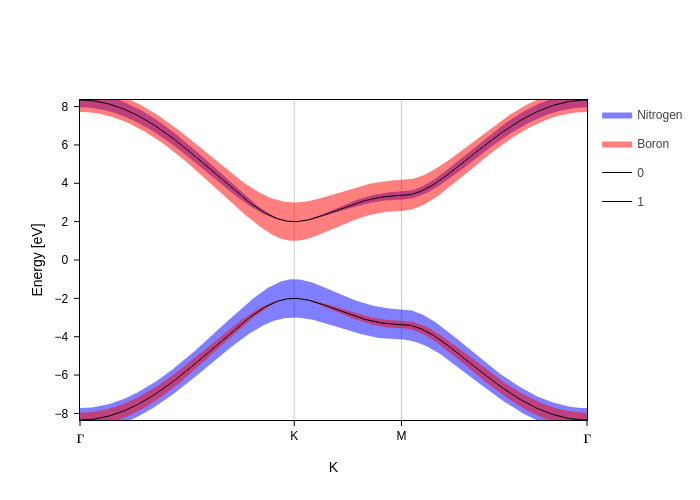

In [10]:
thumbnail_plot = fatbands

if thumbnail_plot:
    thumbnail_plot.show("png")

-------------